In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df['smoker'] = df['smoker'].astype('category')
df['sex'] = df['sex'].astype('category')
df['region'] = df['region'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
from sklearn.preprocessing import LabelEncoder

df['region'].unique()
label_encoder= LabelEncoder()
df['region_encode'] = label_encoder.fit_transform(df['region'])

# ***NEW SECTION -  Data Analyse***

# ***# Part 1*** `Examining the distribution of Bmi (Body Mass Index)`



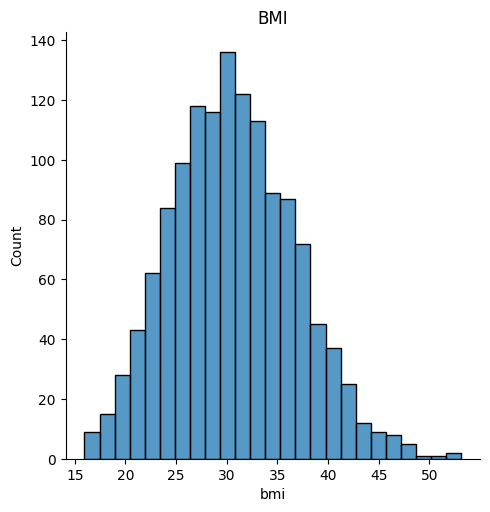

In [6]:
sns.displot(df.bmi)
plt.title('BMI')
plt.show()

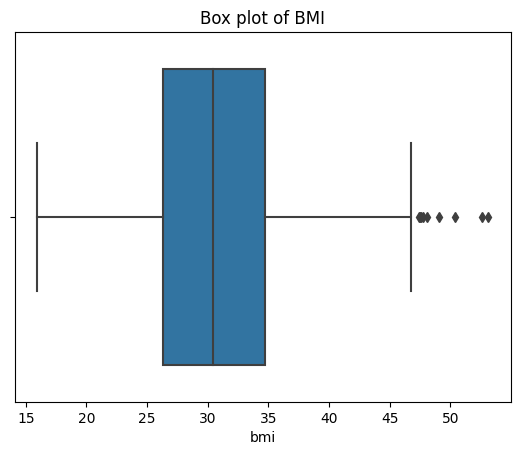

In [7]:
sns.boxplot(x="bmi", data=df)
plt.title('Box plot of BMI')
plt.show()
#There are some outliers on the box plot, as we can see. We need to normalize or clean the outlier data.

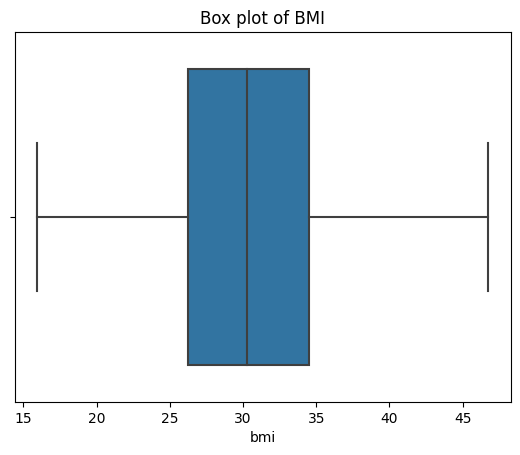

In [8]:
# To clean the outlier data, here we can calculate the IQR and define the lower and upper boundries of the data.
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# And remove the outlier data from the boundries.
df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

sns.boxplot(x="bmi", data=df)
plt.title('Box plot of BMI')
plt.show()
# There is no outlier data for BMI

# ***# Part 2*** `Relationship between “smoker” and “charges”`



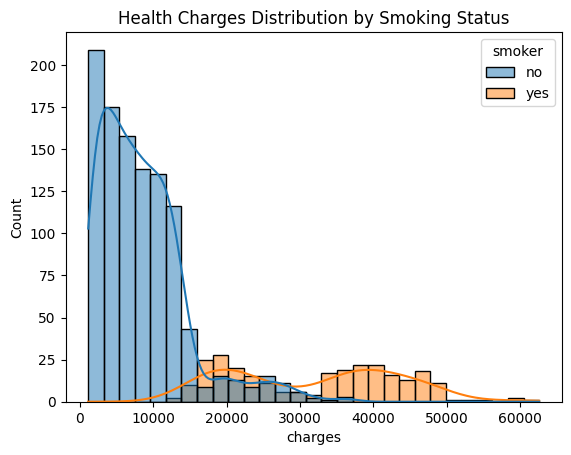

In [9]:
sns.histplot(data=df, x='charges', hue='smoker', kde=True)
plt.title('Health Charges Distribution by Smoking Status')
plt.show()
# As we can see here, the charges that non-smokers pay are lower than those of smokers.

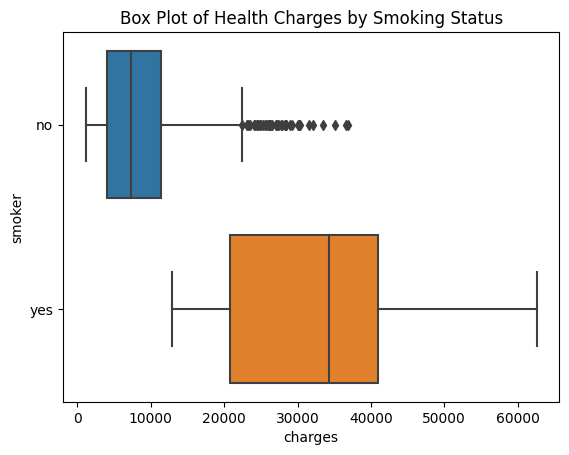

In [10]:
# Let's look if there are any outlier data or not and if there is let's fix it.
sns.boxplot(x='charges', y='smoker', data=df)
plt.title('Box Plot of Health Charges by Smoking Status')
plt.show()

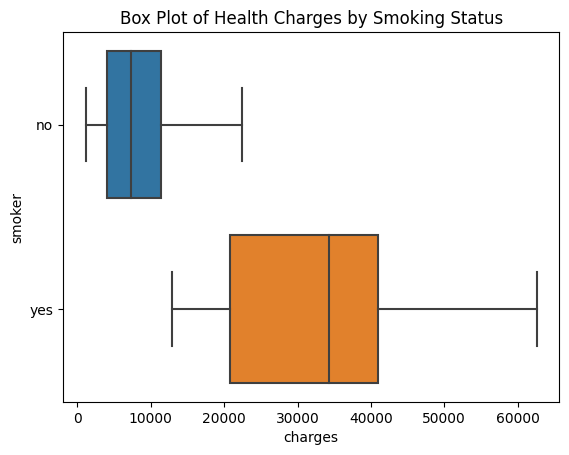

In [11]:
# To clean the outlier data for non smokers, here we can calculate the IQR and define the lower and upper boundries of the data.
Q1 = df[df['smoker'] == 'no']['charges'].quantile(0.25)
Q3 = df[df['smoker'] == 'no']['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# And remove the outlier data from the boundries.
non_smokers_outliers =  df[(df['smoker'] == 'no') & ((df['charges'] < lower_bound) | (df['charges'] > upper_bound))]


#df = df.drop(non_smokers_outliers.index)

if not non_smokers_outliers.empty:
  df.loc[(df['smoker'] == 'no') & (df['charges'] > upper_bound), 'charges'] = upper_bound
  df.loc[(df['smoker'] == 'no') & (df['charges'] < lower_bound), 'charges'] = lower_bound


sns.boxplot(x='charges', y='smoker', data=df)
plt.title('Box Plot of Health Charges by Smoking Status')
plt.show()

# ***# Part 3*** `Relationship between “smoker” and “region”`

In [12]:
# There are 4 region type
df['region'].value_counts()

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

In [13]:
# There are 2 smoker type, smoker or non smoker
df['smoker'].value_counts()

no     1058
yes     271
Name: smoker, dtype: int64

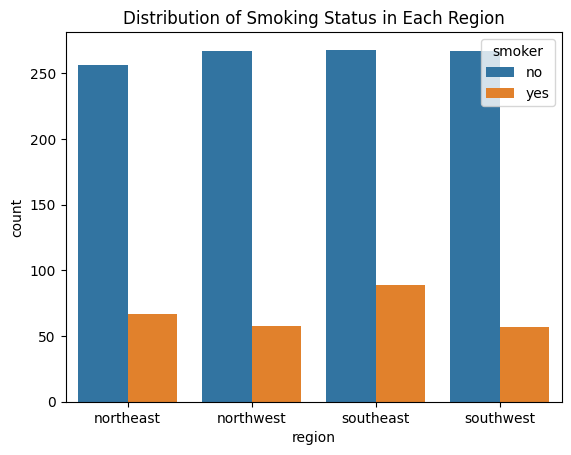

In [14]:
# Here is the bar plot to visualize the proportion of smokers and non-smokers in each region.
sns.countplot(x='region', hue='smoker', data=df)
plt.title('Distribution of Smoking Status in Each Region')
plt.show()

# ***# Part 4*** `Relationship between “bmi” and “sex”`


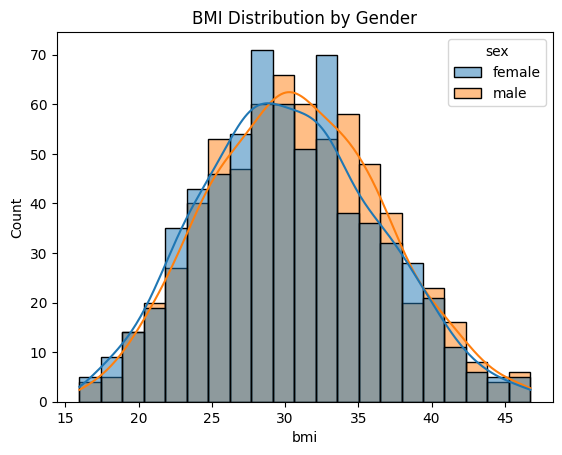

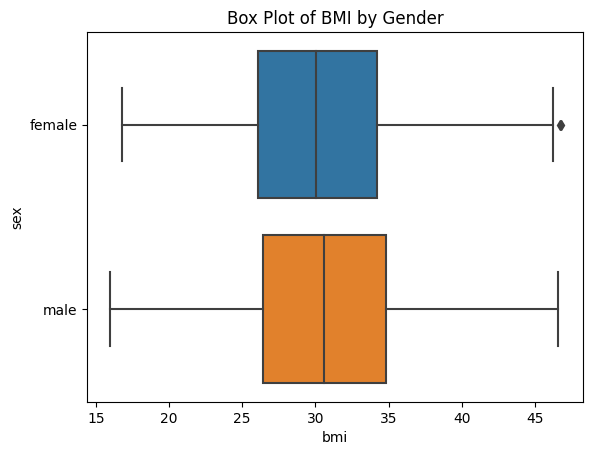

In [15]:
# As we can see here, both sex have similar data spread.
sns.histplot(data=df, x='bmi', hue='sex', kde=True)
plt.title('BMI Distribution by Gender')
plt.show()

sns.boxplot( x='bmi', y='sex', data=df)
plt.title('Box Plot of BMI by Gender')
plt.show()
#There are some outlier data for females

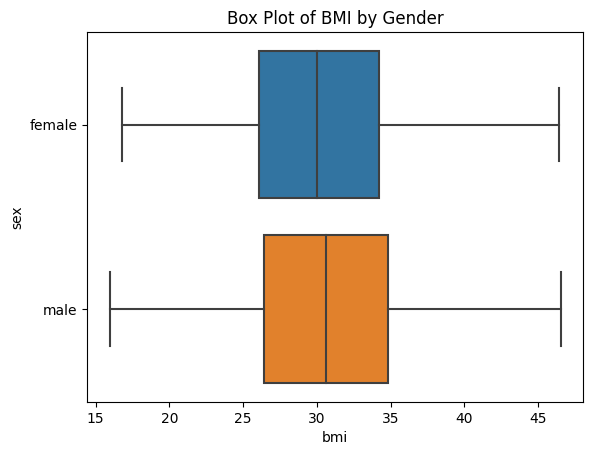

In [16]:
# To clean the outlier data for females, here we can calculate the IQR and define the lower and upper boundries of the data.
Q1 = df[df['sex'] == 'female']['bmi'].quantile(0.25)
Q3 = df[df['sex'] == 'female']['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# And remove the outlier data from the boundries.
female_outliers =  df[(df['sex'] == 'female') & ((df['bmi'] < lower_bound) | (df['bmi'] > upper_bound))]

#df = df.drop(female_outliers.index)

if not female_outliers.empty:
  df.loc[(df['sex'] == 'female') & (df['bmi'] > upper_bound), 'bmi'] = upper_bound
  df.loc[(df['sex'] == 'female') & (df['bmi'] < lower_bound), 'bmi'] = lower_bound


sns.boxplot( x='bmi', y='sex', data=df)
plt.title('Box Plot of BMI by Gender')
plt.show()

# ***# Part 5*** `"region" with the most "children"`

In [17]:
region_children_sum = df.groupby('region')['children'].sum()
region_with_most_children = region_children_sum.idxmax()

print(f"Region with the most children is {region_with_most_children} with {region_children_sum[region_with_most_children]} children.")
# Region with the most children is southwest with 359 children.

Region with the most children is southeast with 378 children.


# ***# Part 6*** `Relationship between “age” and “bmi”`

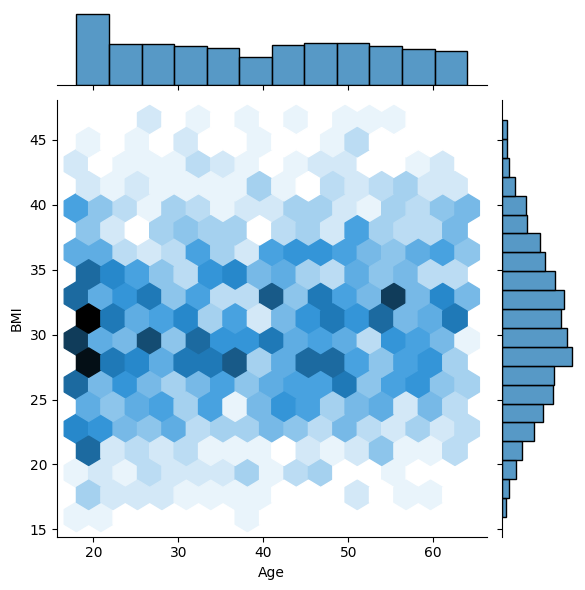

In [18]:
# We can visualize the BMI density by age
sns.jointplot(data=df, x='age', y='bmi', kind='hex')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

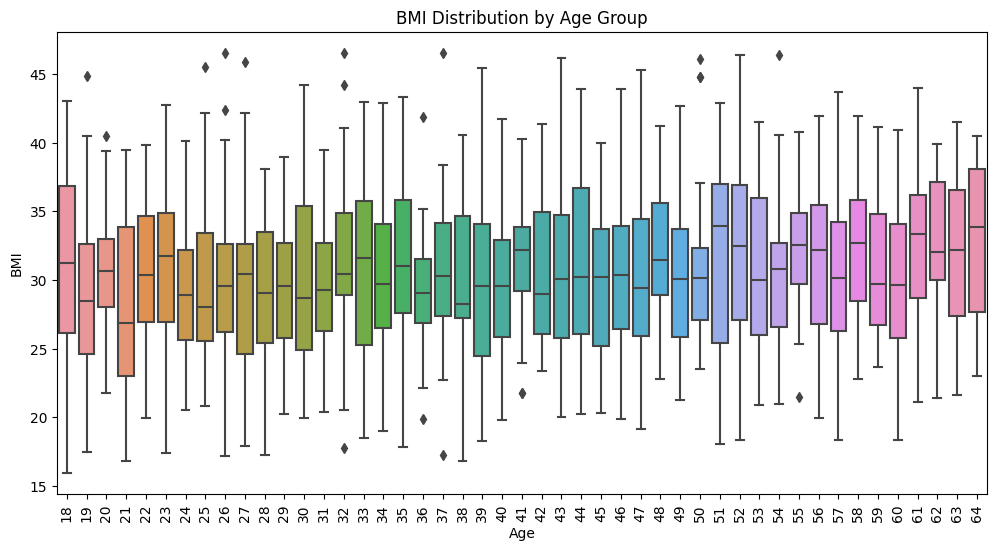

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='bmi', data=df)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI Distribution by Age Group')
plt.xticks(rotation=90)
plt.show()
# As we can see there are some outliers

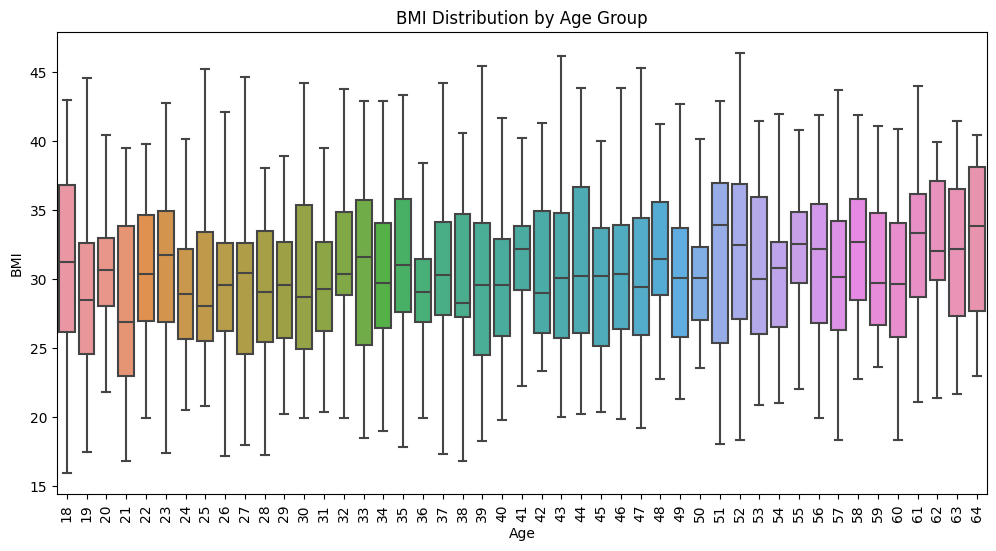

In [20]:
for age in df['age'].unique():
    group_data = df[df['age'] == age]

    Q1 = group_data['bmi'].quantile(0.25)
    Q3 = group_data['bmi'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    group_data_outliers = group_data[(group_data['bmi'] >= lower_bound) & (group_data['bmi'] <= upper_bound)]

    if not group_data_outliers.empty:
      df.loc[(df['age'] == age) & (df['bmi'] > upper_bound), 'bmi'] = upper_bound
      df.loc[(df['age'] == age) & (df['bmi'] < lower_bound), 'bmi'] = lower_bound


plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='bmi', data=df)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI Distribution by Age Group')
plt.xticks(rotation=90)
plt.show()
# As we can see now, there is no outlier data

# ***# Part 7*** `Relationship between “bmi” and “children”`

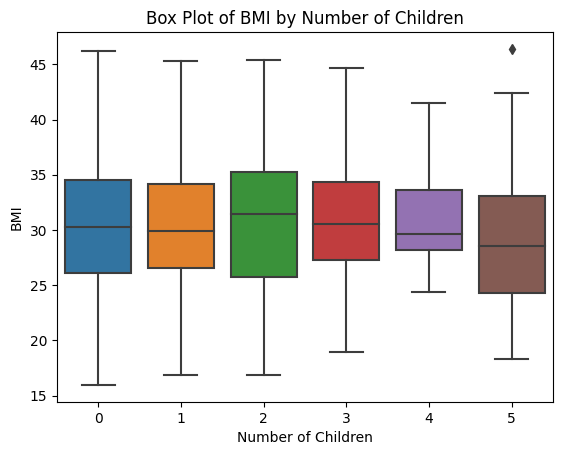

In [21]:
sns.boxplot( x='children', y='bmi', data=df)
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.title('Box Plot of BMI by Number of Children')
plt.show()
# There are some outliers for data with 5 children.

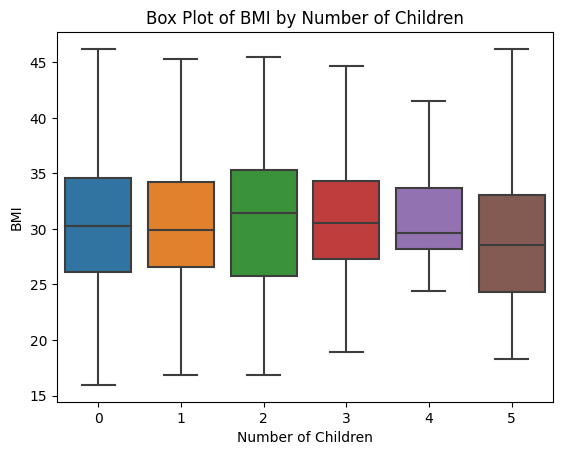

In [22]:
for children in df['children'].unique():
    group_data = df[df['children'] == children]

    Q1 = group_data['bmi'].quantile(0.25)
    Q3 = group_data['bmi'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    group_data_outliers = group_data[(group_data['bmi'] >= lower_bound) & (group_data['bmi'] <= upper_bound)]

    if not group_data_outliers.empty:
      df.loc[(df['children'] == children) & (df['bmi'] > upper_bound), 'bmi'] = upper_bound
      df.loc[(df['children'] == children) & (df['bmi'] < lower_bound), 'bmi'] = lower_bound

sns.boxplot( x='children', y='bmi', data=df)
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.title('Box Plot of BMI by Number of Children')
plt.show()
# As we can see now, there is no outlier data

# ***# Part 8*** `Outliers in the 'bmi' variable`

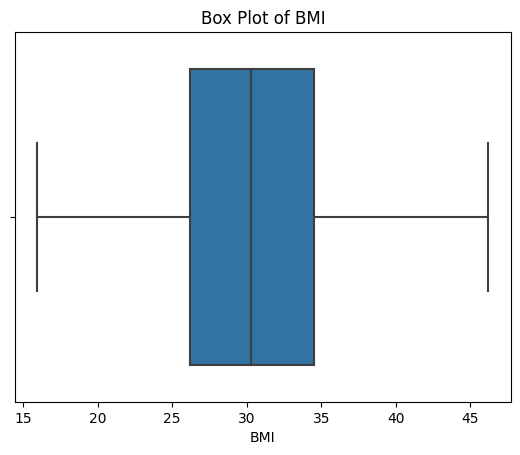

In [23]:
# As we can see there is no outlier in the bmi variable.
sns.boxplot(x='bmi', data=df)
plt.xlabel('BMI')
plt.title('Box Plot of BMI')
plt.show()

# ***# Part 9*** `Relationship between “bmi” and “charges”`

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            1329 non-null   int64   
 1   sex            1329 non-null   category
 2   bmi            1329 non-null   float64 
 3   children       1329 non-null   int64   
 4   smoker         1329 non-null   category
 5   region         1329 non-null   category
 6   charges        1329 non-null   float64 
 7   region_encode  1329 non-null   int64   
dtypes: category(3), float64(2), int64(3)
memory usage: 66.6 KB


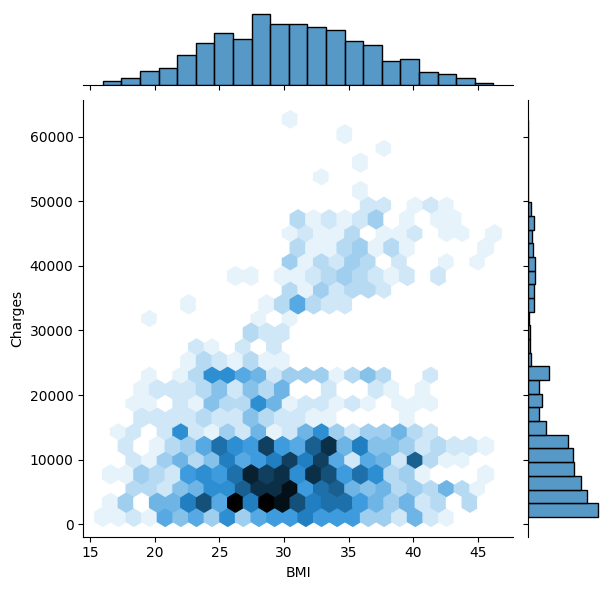

In [25]:
#As we can see here, the charge density for people with a BMI between 25 and 35 is lower than 10,000
sns.jointplot(data=df, x='bmi', y='charges', kind='hex')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# ***# Part 10*** `Relationship between “region”, “smoker” and “bmi”`

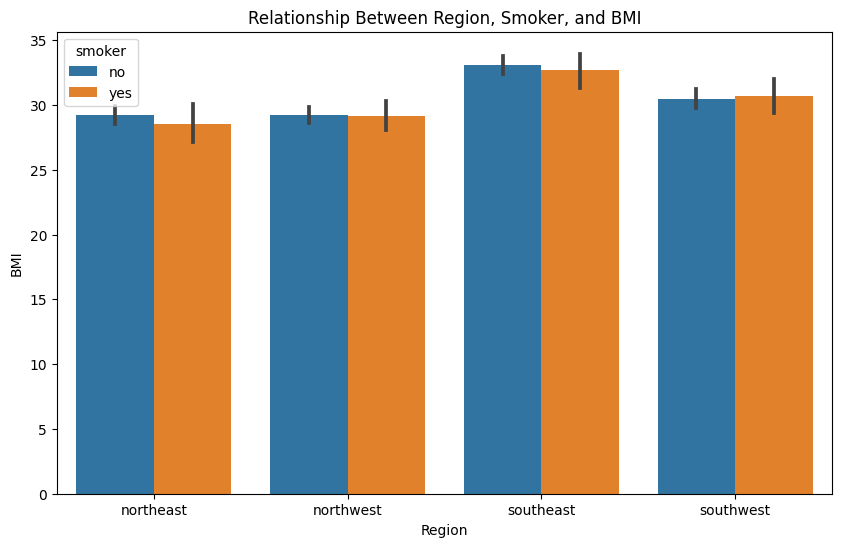

In [26]:
# As we can see here, the BMI mean is almost equal for both smokers and non smokers in every region.
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='region', y='bmi', hue='smoker')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.title('Relationship Between Region, Smoker, and BMI')
plt.show()

# ***NEW SECTION***

<Axes: ylabel='smoker'>

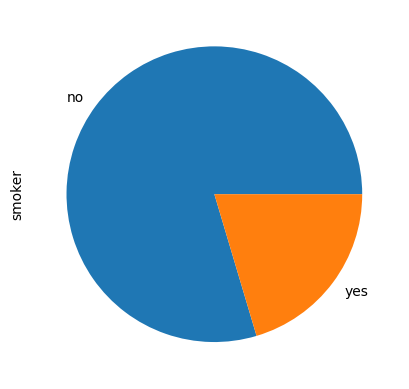

In [27]:
df['smoker'].value_counts().plot.pie()

In [28]:
df['sex'].value_counts()

male      670
female    659
Name: sex, dtype: int64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1329.0,39.203913,14.047835,18.0000,27.0000,39.0000,51.00000,64.00000
bmi,1329.0,30.513147,5.855513,15.9600,26.2200,30.3000,34.48500,46.20000
children,1329.0,1.096313,1.207928,0.0000,0.0000,1.0000,2.00000,5.00000
charges,1329.0,13041.080219,11810.406286,1121.8739,4738.2682,9361.3268,16586.49771,62592.87309
region_encode,1329.0,1.513168,1.106532,0.0000,1.0000,2.0000,2.00000,3.00000


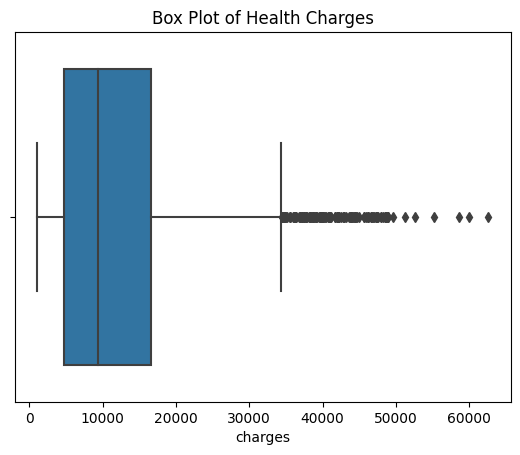

In [30]:
sns.boxplot(x="charges", data=df)
plt.title('Box Plot of Health Charges')
plt.show()
# As we can see there are a lot of outlier data for charges

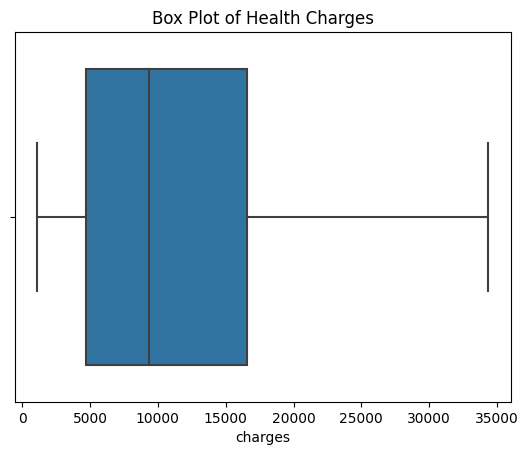

In [31]:
# To clean the outlier data, here we can calculate the IQR and define the lower and upper boundries of the data.
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# And remove the outlier data from the boundries.
outliers =  df[((df['charges'] < lower_bound) | (df['charges'] > upper_bound))]


#df = df.drop(outliers.index)

if not outliers.empty:
  df.loc[(df['charges'] > upper_bound), 'charges'] = upper_bound
  df.loc[(df['charges'] < lower_bound), 'charges'] = lower_bound


sns.boxplot(x='charges', data=df)
plt.title('Box Plot of Health Charges')
plt.show()

<Axes: xlabel='age'>

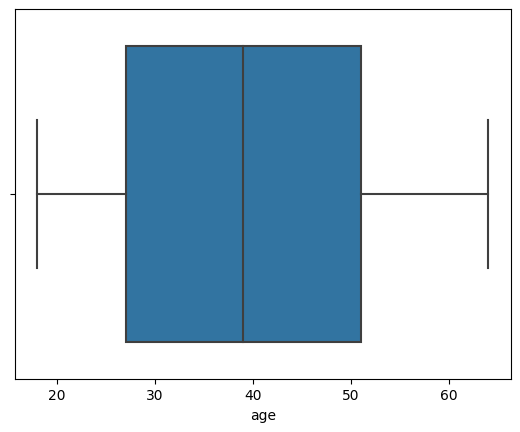

In [32]:
sns.boxplot(x="age", data=df)

<Axes: xlabel='bmi'>

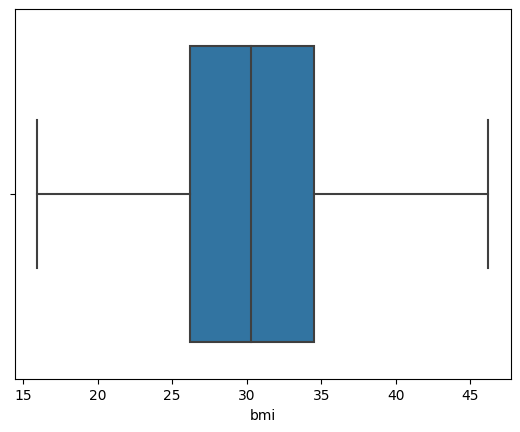

In [33]:
sns.boxplot(x="bmi", data=df)

<Axes: xlabel='children'>

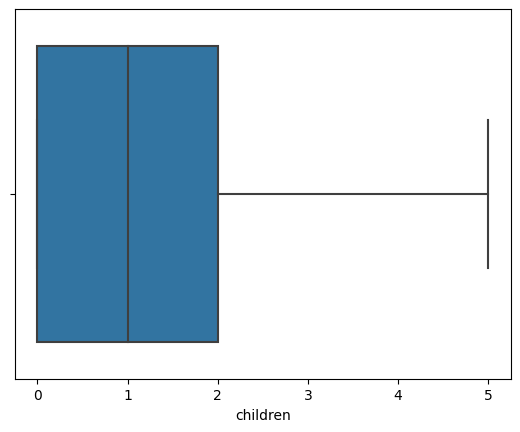

In [34]:
sns.boxplot(x="children", data=df)

# ***Logistic Regression***

[[213   0]
 [  0  53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00        53

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Precision: 1.0
Recall: 1.0


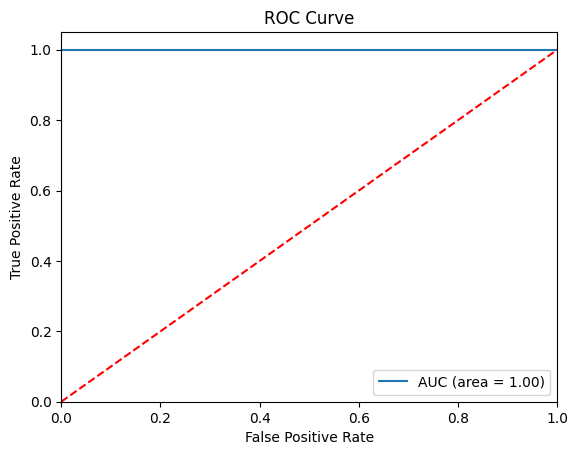

Linear Regression Mean MSE (Cross-Validation): 1.240662164832344e-31

Model: Linear Regression
Mean Squared Error: 0.0
Mean Absolute Error): 0.0
R-squared (R2): 1.00


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
# Data Preparation
df['sex_encode'] = label_encoder.fit_transform(df['sex'])
df['smoker_encode'] = label_encoder.fit_transform(df['smoker'])
y = df['smoker_encode']
X = df[["age", "bmi", "children", "sex_encode", 'smoker_encode', "region_encode"]]

# Train Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

# ROC Curve
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])


print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC (area = {model_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
# Results shows, there is an overfitting. My model is not going to work accurately for real world data.
score = cross_val_score(model2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression Mean MSE (Cross-Validation): {-score.mean()}")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel: Linear Regression")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error): {mae}")
print(f"R-squared (R2): {r2:.2f}")

# ***Linear Regression***

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


My charge: 2389.78


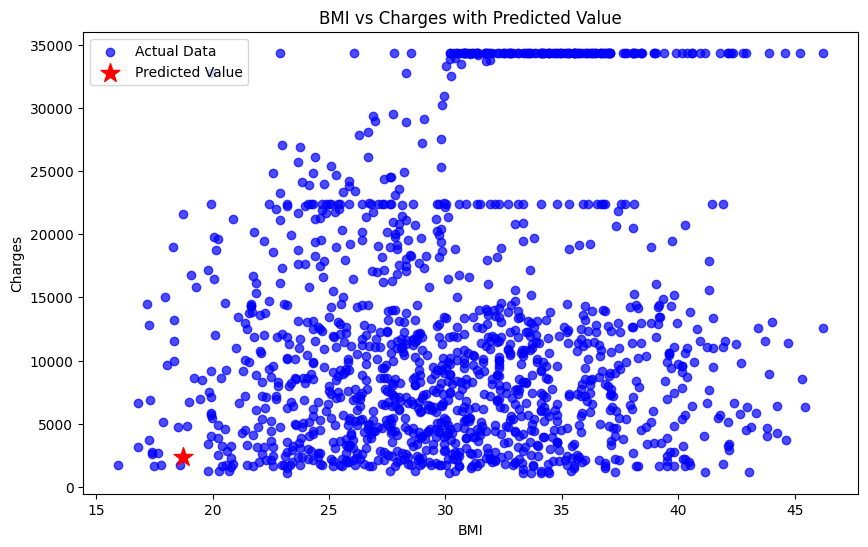

Linear Regression Mean MSE (Cross-Validation): 21552205.21742233

Model: Linear Regression
Mean Squared Error: 20558459.07
Mean Absolute Error: 3004.72
R-squared (R2): 0.79


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Data Preparation
df['sex_encode'] = label_encoder.fit_transform(df['sex'])
df['smoker_encode'] = label_encoder.fit_transform(df['smoker'])
y = df['charges']  # Target variable
X = df[["age", "bmi", "children", "sex_encode", 'smoker_encode', "region_encode"]]  # Features

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Predictions
y_pred = model2.predict(X_test)

# Input data
my_data = np.array([28, 18.72, 0, 1, 0, 2])

# Reshaping and scaling the data
my_data_reshaped = my_data.reshape(1, -1)
my_data_scaled = scaler.transform(my_data_reshaped)

# Predicting
my_charge_pred = model2.predict(my_data_scaled)
print("My charge: {:.2f}".format(my_charge_pred[0]))

# Scatter plot of BMI vs. Charges with Predicted Value
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['charges'], color='blue', label='Actual Data', alpha=0.7)
plt.scatter(my_data[1], my_charge_pred, color='red', marker='*', s=200, label='Predicted Value')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges with Predicted Value')
plt.legend()
plt.show()

# Cross-Validation and Model Evaluation
score = cross_val_score(model2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression Mean MSE (Cross-Validation): {-score.mean()}")

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel: Linear Regression")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


The logistic regression model may not produce reliable results with real-world data due to its tendency to overfit. On the other hand, the linear regression model requires improvements, and further work on the project is needed to address the issues in these models.

Buğra Burak Başer
